In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

import IPython.display as ipd

import pandas as pd
import re
import os
import sys
import numpy as np
import librosa
import librosa.display
import math
from hparams import create_hparams

In [2]:
hparams = create_hparams()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
def clean(txt):
    txt = re.sub("([\!\?]+)[\.]+",r"\1", txt)
    if txt[-1] == ',':
        txt = txt.rstrip(',')
    elif txt[-1] not in ['!','?','.']:
        txt += '.'
    return txt

In [11]:
def build_ds(dataset_path, fn='metadata.csv'):
    data = []
    dp = dataset_path + '/wavs/'
    with open(dataset_path+"/"+fn) as fp:
        for line in fp:
            filename, txt,_ = line.strip().split('|')
            if not os.path.exists(dp+filename+'.wav'):
                continue
            txt = clean(txt)
            y, sr = librosa.load(dp+filename+'.wav')
            dur = librosa.get_duration(y=y, sr=sr)
            data.append({
                'file':filename,
                'len':len(txt),
                'dur': dur
            })
    ds = pd.DataFrame(data)
    return ds

In [7]:
rds = ds
rds['diff'] = rds['len']/rds['dur']


array([[<AxesSubplot:title={'center':'diff'}>]], dtype=object)

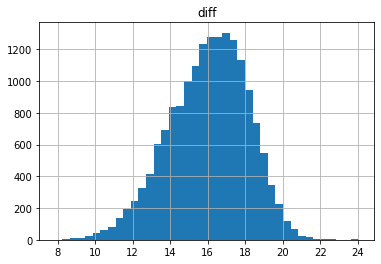

In [8]:
rds.hist('diff', bins=40)

In [12]:
uds = build_ds('/media/creotiv/DATA/DATASETS/uk/female/sumska/all')

array([[<AxesSubplot:title={'center':'diff'}>]], dtype=object)

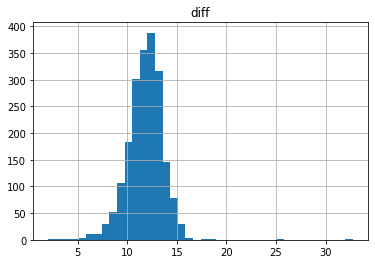

In [15]:
uds['diff'] = uds['len']/uds['dur']
uds.hist('diff', bins=40)

In [ ]:
rds['diff']

In [38]:
len(ds), len(ds[(ds['len']>40) & (ds['len']<140)]), len(ds[ds['dur']< 10])

(3916, 2087, 2047)

In [31]:
len('З тими словами Кайдашиха накинула свиту.')

40

In [24]:
train = ds[ds['dur']< 9]
train_files = set(train['file'])

In [26]:
fw = open('out.csv','w')
with open(path) as fp:
    for line in fp:
        filename,txt,_ = line.strip().split('|')
        txt = clean(txt)
        if filename in train_files:
            fw.write('%s|%s|%s\n' % (filename, txt, txt))
fw.close()